# Optimización de Granjas Eólicas "Onshore"

## Integrantes

* Chacón, W.
* Lugo, A.
* Nanin, D.
* Santos, J.
* Zambrano, J.

## Preparativos del código y definición de funciones

### Importación de librerías

In [ ]:
import numpy as np # Librería NumPy
import matplotlib.pyplot as plt # Librería para hacer los gráficos
from operator import itemgetter # Función que se utiliza en una parte específica del código para iterar índices de listas

### Función que genera una matriz $n\times n$ que contiene una máscara circular compuesta de unos (1) en el borde y dos (2) en la región interna

In [ ]:
def turb_dist(n):
  '''
     
  Parameters
  ----------
    
  n : int
    Tamaño nxn de la matriz deseada

  Returns
  -------

  array : numpy.ndarray
    Matriz nxn compuesta por ceros (0), una máscara circular de unos (1) y
    dos (2), donde los unos representan el borde (posiciones fijas) y los dos
    la región interna del círculo (posiciones que luego serán aleatorias). 

  '''
  # Posición del centro de la máscara circular
  # Siempre queremos que se encuentre en la celda central de nuestra matriz
  c = n//2

  # A continuación, queremos dos máscaras circulares. La primera debe cumplir
  # la función de circunferencia (borde del círculo) y la segunda la región
  # interior del círculo

  # El radio más exterior debe ocupar lo más posible de la matriz, así que
  # mide, horizontalmente, la distancia desde un borde de la matriz hasta el
  # centro de la máscara circular
  # El primer radio recibe el nombre de radio exterior
  rext = c

  # Para hacer la región interna generaremos una segunda máscara circular,
  # pero esta vez de radio -1 respecto del radio exterior
  # Este radio recibe el nombre de radio interior
  rint = rext - 1

  # Generamos dos vectores, un vector columna y un vector fila, de componentes
  # 'x' e 'y', respectivamente, usando la función np.ogrid y especificamos que
  # el intervalo de valores sea [-c:n-c]. Esto para que abarque toda la
  # dimensión de la matriz cuadrada con centro en c
  y,x = np.ogrid[-c:n-c, -c:n-c]

  # Generamos ambas máscaras circulares utilizando la ecuación de una
  # circunferencia. Para conseguir la forma de la matriz deseada
  # multiplicamos el radio por una constante. El valor de dicha constante
  # se determinó a conveniencia del caso de estudio
  # La primera máscara circular corresponde a la del borde del círculo
  edge = x**2 + y**2 <= (rext*1.06)**2

  # Ahora generamos una segunda máscara que corresponde a la región interna
  region = x**2 + y**2 <= (rint*1.12)**2

  # Generamos una matriz de ceros nxn que será, por así decirlo, el lienzo en
  # blanco sobre el que aplicaremos las máscaras que hemos creado
  array = np.zeros((n, n))

  # Aplicamos primero la máscara circular de radio mayor sobre la matriz que
  # acabamos de generar
  # Usaremos unos (1) para este propósito
  array[edge] = 1

  # Ahora aplicamos la segunda máscara, que sólo déjara el borde de la
  # máscara circular anterior y, para diferenciarla de aquella, usaremos dos (2)
  # en ves de unos
  array[region] = 2

  # Retornamos la nueva matriz compuesta de ceros, unos y dos
  return array

Ejemplo:

In [ ]:
# Matriz 9x9 de ejemplo
sample_array = turb_dist(9)
print(sample_array)

[[0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 2. 2. 2. 1. 0. 0.]
 [0. 1. 2. 2. 2. 2. 2. 1. 0.]
 [1. 2. 2. 2. 2. 2. 2. 2. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 1.]
 [0. 1. 2. 2. 2. 2. 2. 1. 0.]
 [0. 0. 1. 2. 2. 2. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]]


### Función que asigna aleatoriamente $n$ cantidad de unos (1) en la región circular interna de la matriz

In [ ]:
def random_pos(array, n):
  '''
     
  Parameters
  ----------
    
  array : numpy.ndarray
    Matriz de retorno de la función turb_dist
  n : int
    Número de posiciones aleatorias que se desean asignar en la región interna
    de la región circular (la compuesta por los números dos) 

  Returns
  -------

  array : numpy.ndarray
    Misma matriz introducida como input que contiene n cantidad de tres (3)
    distribuidos aleatoriamente en la región interior del círculo

  '''
  # Creamos una copia de la matriz input
  random_pos_array = np.copy(array)

  # Esta variable determina cuando se sale del bucle
  sum = 0

  # Guardamos el número de filas y columnas de la matriz input en variables
  num_rows, num_cols = array.shape

  # Esta parte del código se encarga de viajar por cada uno de los elementos que
  # componen la matriz array. Cuando el código se encuentra con un dos (2),
  # existe un 30% de probabilidad que dicho dos se convierta en un uno (1). Si
  # falla, el elemento sigue siendo un dos. En caso de haberse convertido en un
  # uno se suma una unidad a la variable sum y se avanza al siguiente dos.
  # Cuando sum alcanza el valor de n, es decir, cuando n posiciones han sido
  # asignadas aleatoriamente, se rompe la iteración

  # La probabilidad de salir un uno se escogió a conveniencia del tamaño de las
  # matrices con las que se trabajará. Así se evita que sean asignados todo el
  # número de unos escogido en la parte superior de la matriz

  # El propósito de este while es el de asegurarse que el bucle no se rompa
  # hasta que se hayan asignado las n posiciones indicadas
  while sum < n:
    # Aquí se inicia el bucle que pasa por cada elemento de la matriz
    for i in range(num_rows):
      for j in range(num_cols):
        # Se verifica si el elemento actual es un dos. En caso de no serlo, se
        # avanza al siguiente
        if random_pos_array[i,j] == 2:
          # Se verifica si la variable sum alcanzó el valor de n. En caso
          # afirmativo, se rompe el bucle
          if sum < n:
            # Se asigna un número aleatorio entre 1 y 2 (más probabilidad de
            # sacar un 2)
            random_pos_array[i,j] = np.random.choice(np.array([2,1]),1,p=[0.7,0.3])[0]
            # En caso de salir 1, se suma una unidad a la variable sum. En
            # otro caso, se avanza al siguiente elemento
            if random_pos_array[i,j] == 1:
              sum += 1
            else:
              pass
          else:
            break
        else:
          pass

  # Finalmente, todos los dos que pudieron haber quedado de la iteración
  # anterior se sustituyen por ceros
  random_pos_array[random_pos_array == 2] = 0
  return random_pos_array

Ejemplo:

In [ ]:
# Matriz de ejemplo a la que se le han asignado 5 posiciones aleatorias en la
# región circular interna
# El output de esta función es el que usaremos como matriz de estudio
# Nótese que los dos (2) restantes son sustituidos por ceros (0)
sample_random_pos = random_pos(sample_array,5)
print(sample_random_pos)

[[0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]]


### Función que genera una matriz cuyos unos (1) son sustituidos por tuplas $(y,x)$ que indican su posición dentro de la matriz

In [ ]:
def coord_array(array):
  '''

  Parameters
  ----------
    
  array : numpy.ndarray
    Matriz compuesta de ceros, unos y dos

  Returns
  -------

  tensor : numpy.ndarray
    Matriz en donde fueron sustituidos los unos (1) por listas de dos
    elementos que indican la posición fila/columna que ocupa cada turbina
    (elemento diferente de cero) en dicha matriz

  '''
  # Guardamos el número de filas y columnas de la matriz input en variables
  num_rows, num_cols = array.shape

  # Generamos una matriz llena de ceros del mismo tamaño de la matriz input
  # que podamos llenar de objetos como la tupla, en este caso
  tensor = np.zeros((num_rows,num_cols),dtype='object')
  
  # Se itera por cada elemento de la matriz
  for i in range(num_rows):
      for j in range(num_cols):
        # En caso de encontrar 1, se guarda su ubicación en la matriz en una
        # tupla de dos elementos en la matriz tensor en la misma posición 
        if array[i,j] == 1:
          tensor[i,j] = (i,j)
  return tensor

Ejemplo:

In [ ]:
# Matriz de ejemplo con posiciones aleatorias a la que se le han sustituido los
# uno (1) por tuplas (y,x) que inidican su posición dentro de la matriz
sample_coord_array = coord_array(sample_random_pos)
print(sample_coord_array)

[[0 0 0 (0, 3) (0, 4) (0, 5) 0 0 0]
 [0 0 (1, 2) 0 0 0 (1, 6) 0 0]
 [0 (2, 1) (2, 2) 0 0 0 0 (2, 7) 0]
 [(3, 0) 0 (3, 2) 0 0 0 0 (3, 7) (3, 8)]
 [(4, 0) (4, 1) 0 0 0 0 0 (4, 7) (4, 8)]
 [(5, 0) 0 0 0 0 0 0 0 (5, 8)]
 [0 (6, 1) 0 0 0 0 0 (6, 7) 0]
 [0 0 (7, 2) 0 0 0 (7, 6) 0 0]
 [0 0 0 (8, 3) (8, 4) (8, 5) 0 0 0]]


### Función para calcular la rapidez del viento que entra en una turbina considerando el efecto estela causado por las demás

In [ ]:
def Viento_turb_Gauss(o, p, matrix):  # Bastankhah's Gaussian Model    
    vel_viento = 10.5 #[m/s]
    r0 = 91.25 #[m]   #Radio de la estela inmediatamente dentrás del rotor
    k = 0.0324555
    #v[o][p] Turbina de referencia sobre la que se trabaja
    viento_ = 0
    wind_def = 0
    dim = np.size(matrix,0)
    g = matrix[0:dim, p:dim] #Submatriz con turbinas a considerar para el efecto estela 
    #Cálculo de défecit de viento en turbina de referencia con el resto
    for i in range(dim):
        for j in range(dim-p):
            if isinstance(g[i][j], tuple) and g[i][j] != g[o][0]:
                x = (g[i][j][1] - g[o][0][1]) * 650.   #Distancia x entre turbinas
                y = (g[i][j][0] - g[o][0][0]) * 650.   #Distancia y entre turbinas
                #Radio de la estela a distancia x
                r_w = (0.054 * x) + r0
                if x > 0. and np.absolute(y) <= r_w:   #Condición para la selección de turbinas que afectan a la de referencia
                    # Ecuaciones del modelo gaussiano de Bastankhah
                    sigma = k*x + (130)/np.sqrt(8.)
                    exponent = -0.5 * (y/sigma)**2
                    radical = 1. - 0.884/(8.*(sigma**2) / (130)**2)
                    viento_ = ( (1. - np.sqrt(radical)) * np.exp(exponent) )**2
                    wind_def = wind_def + viento_
            else:
                pass
        wind_def_total = vel_viento * (1 - np.sqrt(wind_def))
    return wind_def, wind_def_total

### Función que calcula la potencial total de salida de una distribución de turbinas

In [ ]:
def Potencia_total(matrix):
  
    #Caracterísitcas de funcionamiento de la turbina a emplear

    Vcut_in = 4. #[m/s] 
    Vcut_out = 25. #[m/s]
    Vrat = 9.8 #[m/s]
    P_rat = 3.35 #[MW]
    acumular = 0
    num_rows, num_cols = matrix.shape
    
    #Determinación de potencia individual por turbina
    for i in range(num_rows):
        for j in range(num_cols):
            if isinstance(matrix[i][j], tuple):
                array = Viento_turb_Gauss(i, j, matrix)
                #Condiciones de potencia según viento de entrada en turbina
                if array[1] < Vcut_in or array[1] >= Vcut_out:
                    pot = 0
                elif array[1] < Vrat and array[1] >= Vcut_in:
                    pot = P_rat * (((array[1]-Vcut_in)/(Vrat - Vcut_in))**3)
                elif array[1] < Vcut_out and array[1] >= Vrat:
                    pot = P_rat
                    
                acumular = acumular + pot 
            else:
                pass
    #Potencia total de la granja eólica            
    Potencia = acumular        
    return Potencia  

Ejemplo:

In [ ]:
# Potencia total de salida de la matriz de ejemplo
sample_total_power = Potencia_total(sample_coord_array)
# El output da el resultado en mega vatios (MW)
print(sample_total_power)

64.30799732141458


### Función que calcula la eficiencia de una distribución

In [ ]:
# Para la eficiencia

def Efficency(n_turb, matrix):
    #Power without the wake effect
    vel_wind = 10.
    P_sin = n_turb * 3.35
    P_con = Potencia_total(matrix)
    Eff = P_con/P_sin
    return Eff

Ejemplo:

In [ ]:
# Número de turbinas de la matriz de ejemplo
nturb = np.count_nonzero(sample_random_pos == 1)
# Eficiencia de la matriz de ejemplo
sample_efficency = Efficency(nturb, sample_coord_array)
print(sample_efficency)

0.7678566844348009


### Función que calcula un estimado del costo del cableado de la distribución considerando una central eléctrica hipotética

In [ ]:
def costos(matrix):
    cableDPKm = 0.591280     #M$ / km
    TurbCost = 2.0           #M$ / unidad
    LongEntTurb = 1.517      #km
    num_rows, num_cols = matrix.shape
    centerPos = np.array([ np.round( num_rows/2 ), num_rows + 0.25 ])  #posición de la central
    costoTotal = 1
    for i in range(num_rows):
        for j in range(num_cols):
            costoTotal += matrix[i,j] * np.sum( np.abs( np.array([i, j]) - centerPos ) ) * cableDPKm
    
    costoTotal += np.sum(matrix) * LongEntTurb
    
    return costoTotal

Ejemplo:

In [ ]:
# Costo estimado del cableado de la matriz de ejemplo
sample_cost = costos(sample_random_pos)
# El output da el resultado en millones de dólares (M$)
print(sample_cost)

147.86834000000002


### Función que genera una lista que contiene $nsamples$ distribuciones con datos sobre ella. La lista está ordenada de acuerdo al valor de la función objetivo de cada una, del menor valor al mayor

In [ ]:
def samples(array_size,nalturb,nsamples):
  '''

  Parameters
  ----------
    
  array_size : int
    Tamaño de la matriz que se desea generar
  nalturb : int
    Número de turbinas que se desean posicionar aleatoriamente en la
    región marcada como interna de la matriz
  nsamples : int
    Número de muestras

  Returns
  -------

  final_log : list
    Lista de nsamples elementos que contiene a su vez listas que
    están compuestas por lo siguiente:
    1. Matriz de tamaño array_sizexarray_size que posiciona las turbinas de la
    distribución con unos (1) y el resto de espacios con ceros (0)
    2. Potencia total generada por la distribución
    3. Eficiencia de la distribución
    4. Costo del cableado de la distribución
    5. Función objetivo: potencia * eficiencia / costo
    La lista final_log está ordenada según el valor de la función objetivo de
    forma creciente
  '''
  # Creamos la lista vacía log
  log = []

  # Creamos la matriz base a la que luego cambiaremos las posiciones de la
  # región circular interior
  array = turb_dist(array_size)

  # Número de turbinas
  nturb = np.count_nonzero(array == 1) + nalturb

  # Creamos nsamples distribuciones
  for i in range(nsamples):

    # Generamos la distribución, creando primero la matriz y luego
    # asignando nalturb posiciones aleatorias en la región circular interna,
    # dejando las posiciones de las turbinas en los bordes fijas 
    distribution = random_pos(array, nalturb)

    # Generamos la matriz que contiene las coordenadas de cada turbina en vez
    # de unos (1)
    tensor_distribution = coord_array(distribution)

    # Potencia total de salida
    total_power = Potencia_total(tensor_distribution) 

    # Eficiencia
    efficency = Efficency(nturb,tensor_distribution)

    # Costo
    cost = costos(distribution)

    # Función objetivo
    objective_function = efficency * total_power / cost

    # Lista de los resultados obtenidos
    result = [distribution, total_power, efficency, cost, objective_function]
    
    # Añadimos la distribución a log
    log.append(result)

  # Organizamos de acuerdo a su valor promedio, yendo desde el menor valor hasta
  # el mayor
  final_log = sorted(log, key = itemgetter(4))

  return final_log

### Función que muestra el análisis sobre una distribución de forma más legible

In [ ]:
def analisis(result, index):
  '''

  Parameters
  ----------
    
  result: list
    Output de la función samples a la que se desea realizar el análisis
  index : int
    Índice del elemento de la lista de estudio

  '''
  print(\
  "Número total de turbinas: {}".format(np.sum(result[index][0])) + "\n" +\
  "Potencia total de salida: {:.2f} MW".format(result[index][1]) + "\n" +\
  "Eficiencia de la distribución: {:.2f}".format(result[index][2]) + "\n" +\
  "Costo estimado del cableado: {:.2f} millones de dólares".format(result[index][3]) + "\n" +\
  "Función objetivo: {:.2f}".format(result[index][4])\
  )

## Casos de estudio

In [ ]:
# Número de muestras
nsamples = 10000

### Caso N°1: Matriz 5x5, 10 turbinas en total, 2 turbinas aleatorias

Matriz 5x5

In [ ]:
r1 = samples(5,2,nsamples)

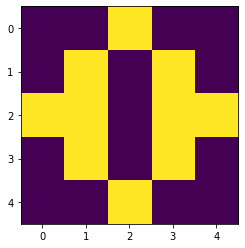

In [ ]:
plt.imshow(r1[nsamples-1][0])

In [ ]:
analisis(r1,nsamples-1)

Número total de turbinas: 10.0
Potencia total de salida: 25.55 MW
Eficiencia de la distribución: 0.76
Costo estimado del cableado: 40.12 millones de dólares
Función objetivo: 0.49


### Caso N°2: Matriz 7x7 y matriz 9x9, 8 y 4 turbinas con posiciones aleatorias, respectivamente, 24 turbinas en total

Matriz 7x7

In [ ]:
r2 = samples(7,8,nsamples)

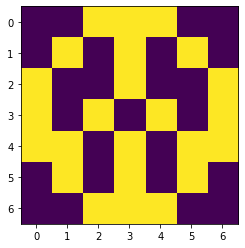

In [ ]:
plt.imshow(r2[nsamples-1][0])

In [ ]:
analisis(r2,nsamples-1)

Número total de turbinas: 24.0
Potencia total de salida: 55.41 MW
Eficiencia de la distribución: 0.69
Costo estimado del cableado: 121.37 millones de dólares
Función objetivo: 0.31


Matriz 9x9

In [ ]:
r3 = samples(9,4,nsamples)

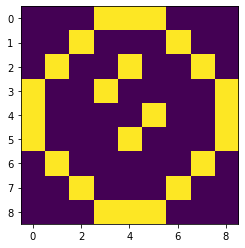

In [ ]:
plt.imshow(r3[nsamples-1][0])

In [ ]:
analisis(r3,nsamples-1)

Número total de turbinas: 24.0
Potencia total de salida: 69.76 MW
Eficiencia de la distribución: 0.87
Costo estimado del cableado: 142.66 millones de dólares
Función objetivo: 0.42


### Caso N°3: Matriz 7x7 y matriz 9x9, 10 y 6 turbinas con posiciones aleatorias, respectivamente, 26 turbinas en total

Matriz 7x7

In [ ]:
r4 = samples(7,10,nsamples)

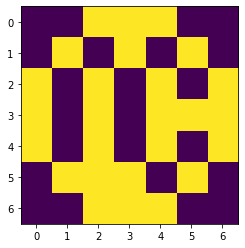

In [ ]:
plt.imshow(r4[nsamples-1][0])

In [ ]:
analisis(r4,nsamples-1)

Número total de turbinas: 26.0
Potencia total de salida: 55.37 MW
Eficiencia de la distribución: 0.64
Costo estimado del cableado: 131.20 millones de dólares
Función objetivo: 0.27


Matriz 9x9

In [ ]:
r5 = samples(9,6,nsamples)

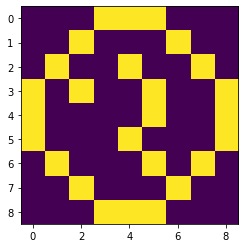

In [ ]:
plt.imshow(r5[nsamples-1][0])

In [ ]:
analisis(r5,nsamples-1)

Número total de turbinas: 26.0
Potencia total de salida: 74.02 MW
Eficiencia de la distribución: 0.85
Costo estimado del cableado: 153.08 millones de dólares
Función objetivo: 0.41


### Caso N°4: Matriz 7x7 y matriz 9x9, 12 y 8 turbinas con posiciones aleatorias, respectivamente, 28 turbinas en total

Matriz 7x7

In [ ]:
r6 = samples(7,12,nsamples)

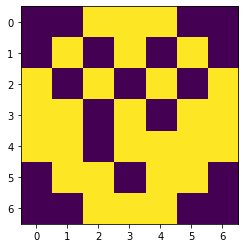

In [ ]:
plt.imshow(r6[nsamples-1][0])

In [ ]:
analisis(r6,nsamples-1)

Número total de turbinas: 28.0
Potencia total de salida: 54.41 MW
Eficiencia de la distribución: 0.58
Costo estimado del cableado: 139.26 millones de dólares
Función objetivo: 0.23


Matriz 9x9

In [ ]:
r7 = samples(9,8,nsamples)

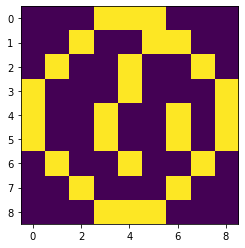

In [ ]:
plt.imshow(r7[nsamples-1][0])

In [ ]:
analisis(r7,nsamples-1)

Número total de turbinas: 28.0
Potencia total de salida: 76.64 MW
Eficiencia de la distribución: 0.82
Costo estimado del cableado: 162.91 millones de dólares
Función objetivo: 0.38


### Caso N°5: Matriz 7x7 y matriz 9x9, 14 y 10 turbinas con posiciones aleatorias, respectivamente, 30 turbinas en total

Matriz 7x7

In [ ]:
r8 = samples(7,14,nsamples)

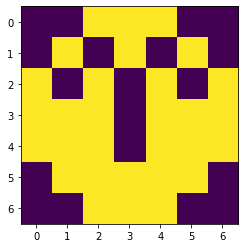

In [ ]:
plt.imshow(r8[nsamples-1][0])

In [ ]:
analisis(r8,nsamples-1)

Número total de turbinas: 30.0
Potencia total de salida: 53.27 MW
Eficiencia de la distribución: 0.53
Costo estimado del cableado: 149.10 millones de dólares
Función objetivo: 0.19


Matriz 9x9

In [ ]:
r9 = samples(9,10,nsamples)

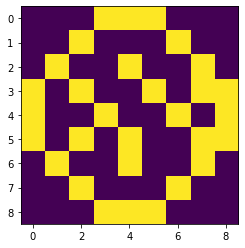

In [ ]:
plt.imshow(r9[nsamples-1][0])

In [ ]:
analisis(r9,nsamples-1)

Número total de turbinas: 30.0
Potencia total de salida: 77.59 MW
Eficiencia de la distribución: 0.77
Costo estimado del cableado: 171.57 millones de dólares
Función objetivo: 0.35
